In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as sci

#Définir les constantes

In [0]:
CA0 = 1.5 # mol/L
CB0 = 2 # mol/L
CC0 = 0 # mol/L
CD0 = 0 # mol/L
CE0 = 0 # mol/L
CF0 = 0 # mol/L
Vdot = 10 # L/min
FA0 = CA0 * Vdot
FB0 = CB0 * Vdot
FC0 = 0
FD0 = 0
FE0 = 0
FF0 = 0


#Définir les équations à résoudre


In [0]:
def equations(variables, V, Vdot): #passer dans la liste les constantes dont on a besoin
  FA, FB, FC, FD, FE, FF = variables
  
  CA = FA / Vdot
  CB = FB / Vdot
  CC = FC / Vdot
  CD = FD / Vdot
  CE = FE / Vdot
  CF = FF / Vdot
  
  
  r1 = 0.25 * CA * CB # mol(L*min)
  r2 = 0.1 * CA * CD # mol(L*min)
  r3 = 5 * (CB**2) * CC # mol(L*min)
  
  RA = -r1-3*r2
  RB = -2*r1-r3
  RC = r1 + r2 - 2*r3
  RD = r1 - 2*r2 + r3
  RE = r2
  RF = r3
  
  dFAdV = RA 
  dFBdV = RB 
  dFCdV = RC 
  dFDdV = RD 
  dFEdV = RE 
  dFFdV = RF 
  
  return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV
  

#Définir les conditions initiales

In [0]:
conditions_initiales = [FA0, FB0, FC0, FD0, FE0, FF0]

#Résoudre le problème à l'aide du solveur

In [0]:
V = np.linspace(0, 50, 500) # définir les bornes d'intégration
resultats = sci.odeint(equations, conditions_initiales, V, (Vdot,)) #s'il n'y avait qu'une constante, il faut mettre (a,)

In [0]:
FA = resultats[:,0] #récupérer toutes les valeurs de toutes les lignes et de la colonne 1 (indice 0)
FB = resultats[:,1]
FC = resultats[:,2]
FD = resultats[:,3]
FE = resultats[:,4]
FF = resultats[:,5]

In [0]:
X = (FA0 - FA) / FA0

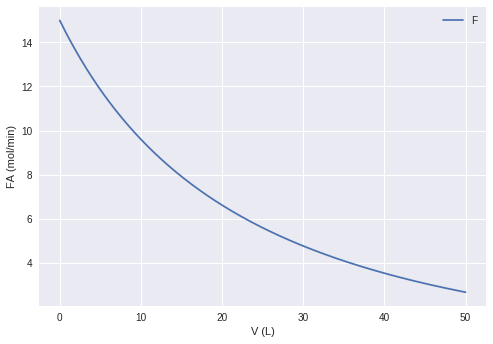

In [99]:
plt.plot(V, FA)
plt.xlabel('V (L)')
plt.ylabel('FA (mol/min)')
plt.legend('FA')
plt.show()

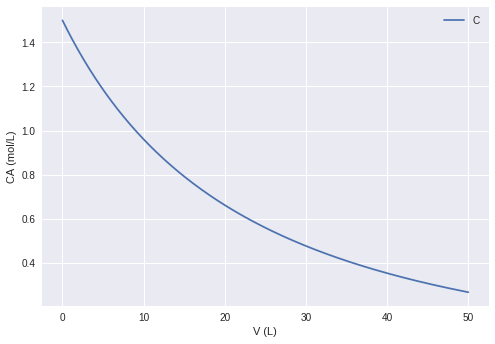

In [100]:
plt.plot(V, CA)
plt.xlabel('V (L)')
plt.ylabel('CA (mol/L)')
plt.legend('CA')
plt.show()

In [105]:
X[V < 50][-1] 

0.8222201479606811

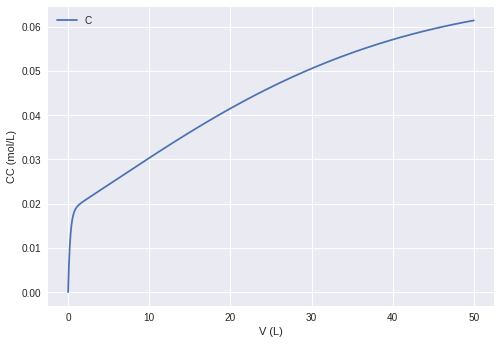

In [102]:
plt.plot(V, CC)
plt.xlabel('V (L)')
plt.ylabel('CC (mol/L)')
plt.legend('CC')
plt.show()

In [103]:
CC[V < 50][-1] 

0.0613885029021292